# Approximation of $\pi$ by simple series

From the calculus, you probably know this series
$$\frac{\pi^2}{6} = \sum_{k = 1}^\infty \frac{1}{k^2}$$
but unfortunately, it is converging slowly.

In [1]:
n = 1000000
sum = 0.0

for k in range(1, n + 1):
    sum += 1.0 / (k * k)

result = 3.141592653589793 - (6.0 * sum) ** 0.5
print(f"Accuracy with {n} terms is {result}")

Accuracy with 1000000 terms is 9.54929284535666e-07


Another series
$$\frac{\pi^4}{90} = \sum_{k = 1}^\infty \frac{1}{k^4}$$
converges much faster. Why?

In [4]:
import math

n = 100
sum = 0.0

for k in range(1, n + 1):
    sum += 1.0 / k**4

result = math.pi - (90.0 * sum)**0.25
print(f"Accuracy with {n} terms is {result}")


Accuracy with 100 terms is 2.3828242534662536e-07


# Archimedes' approximation of $\pi$

## Basic iterations

There are two possibilities to write the recurrence relation for the circumference of polygons in the circle:
$$y_{k+1} = \frac{2^{k+1}}{\sqrt{2}}\sqrt{1-\sqrt{1-\left(\frac{y_k}{2^k}\right)^2}}$$
which is not suited for numerical evaluation as it includes the subtraction of two close numbers, and
$$x_{k+1} = x_k\frac{2}{\sqrt{1+\sqrt{1-\left(\frac{x_k}{2^k}\right)^2}}}$$
where we add up two close numbers.

Let us calculate the sequences numerically and compare them with the exact sequence given by
$$2^k \sin(\pi/2^k)$$

In [1]:
# code generated by Copilot from Mathematica equivalent in pi.Mathematica.ipynb
import numpy as np
import matplotlib.pyplot as plt

n = 30
y = np.zeros(n)
x = np.zeros(n)
y = 2.0
x = 2.0
tk = 2.0

for i in range(1, n):
    y[i] = 2.0 * tk * np.sqrt((1.0 - np.sqrt(1.0 - (y[i - 1] / tk)**2)) / 2.0)
    x[i] = x[i - 1] * np.sqrt(2.0 / (1.0 + np.sqrt(1.0 - (x[i - 1] / tk)**2)))
    tk = 2.0 * tk

exact = np.array([2**k * np.sin(np.pi / 2**k) for k in range(1, n + 1)])

plt.figure()
plt.loglog(np.abs(exact - y), label='y series', color='blue')
plt.loglog(np.abs(exact - x), label='x series', color='green')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

TypeError: 'float' object is not subscriptable

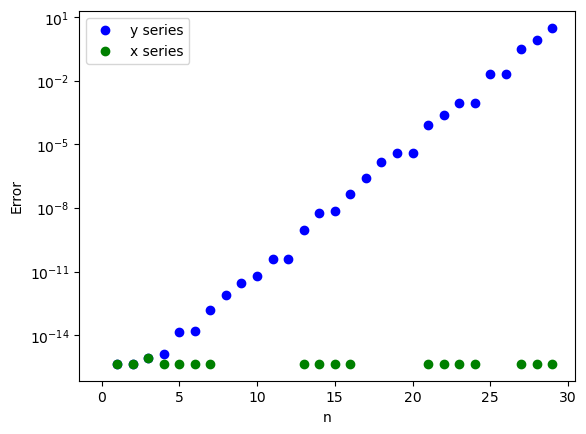

In [2]:
# corrected code
import numpy as np
import matplotlib.pyplot as plt

n = 30
y = np.zeros(n)
x = np.zeros(n)
y[0] = 2.0
x[0] = 2.0
tk = 2.0

for i in range(1, n):
    y[i] = 2.0 * tk * np.sqrt((1.0 - np.sqrt(1.0 - (y[i - 1] / tk)**2)) / 2.0)
    x[i] = x[i - 1] * np.sqrt(2.0 / (1.0 + np.sqrt(1.0 - (x[i - 1] / tk)**2)))
    tk = 2.0 * tk

exact = np.array([2**k * np.sin(np.pi / 2**k) for k in range(1, n + 1)])

plt.figure()
plt.yscale("log")
plt.plot(np.abs(exact - y), 'bo', label='y series')
plt.plot(np.abs(exact - x), 'go', label='x series')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

The absolute error of the consequent approximations of $\pi$

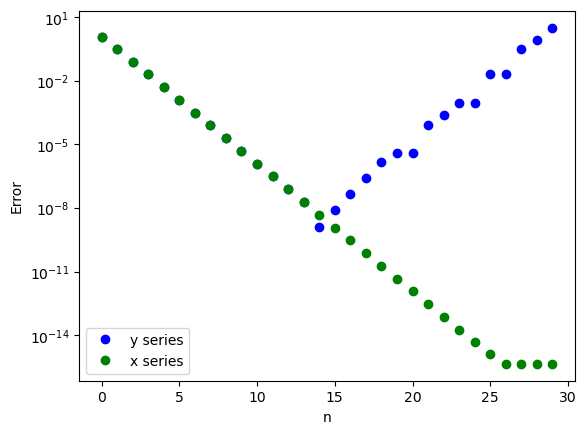

In [5]:
plt.figure()
plt.yscale("log")
plt.plot(np.abs(math.pi - y), 'bo', label='y series')
plt.plot(np.abs(math.pi - x), 'go', label='x series')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

## Acceleration of convergence - Aitken's $\Delta^2$ process

First, we load the module with functions for acceleration:

In [6]:
import BasicFunctionsNTMF057 as basfunc

Aitken's $\Delta^2$-process is a simple technique to accelerate the linear convergence of a series $x_k$ by introducing a new series $Ax_k$ that converges faster but still linearly:
$$Ax_k = x_k - \frac{(\Delta x_k)^2}{\Delta^2 x_k}$$
where $\Delta x_k = x_{k+1} - x_k$ and $\Delta^2 x_k = x_{k+2} - 2 x_{k+1} + x_k$.

We can accelerate several times. Below, we apply Aitken's $\Delta^2$-process 3 times:

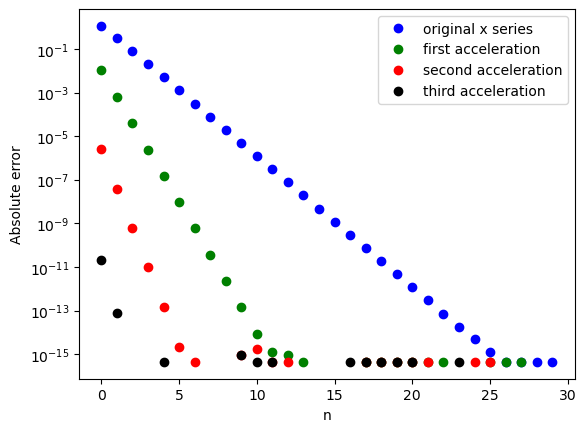

In [7]:
Ax1 = basfunc.MyAitkenDeltaSquareProcess(x);
Ax2 = basfunc.MyAitkenDeltaSquareProcess(Ax1);
Ax3 = basfunc.MyAitkenDeltaSquareProcess(Ax2);
plt.figure()
plt.yscale("log")
plt.plot(np.abs(math.pi - x), 'bo', label='original x series')
plt.plot(np.abs(math.pi - np.array(Ax1)), 'go', label='first acceleration')
plt.plot(np.abs(math.pi - np.array(Ax2)), 'ro', label='second acceleration')
plt.plot(np.abs(math.pi - np.array(Ax3)), 'ko', label='third acceleration')
plt.xlabel('n')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

# Chudnovsky approximation of $\pi$

This is the actual series which is used by Mathematica and other programs to calculate $\pi$ efficiently (Chudnovsky algorithm)
$$\frac{1}{\pi} = 12\sum_{k=0}^{\infty}\frac{(-1)^{k}(6k)!(545140134k+13591409)}{(3k)!(k!)^{3}(640320)^{3k+3/2}}$$

In [8]:
# code generated by Copilot from Mathematica equivalent in pi.Mathematica.ipynb - not working ;-)
import decimal
from math import factorial

# Set the precision to 50 decimal places
decimal.getcontext().prec = 50

def MyPi(nn):
    sum_value = decimal.Decimal(0)
    for k in range(nn + 1):
        numerator = decimal.Decimal((-1)**k * factorial(6 * k) * (163 * 3344418 * k + 13591409))
        denominator = decimal.Decimal(factorial(3 * k) * (factorial(k)**3) * 640320**(3 * k + 1.5))
        sum_value += numerator / denominator
    return decimal.Decimal(1) / (12 * sum_value)

# Print the value of Pi to 50 decimal places
pi_value = decimal.Decimal('3.14159265358979323846264338327950288419716939937510')
print(f"{pi_value}, exact Pi")

nterms = 3
for i in range(1, nterms + 1):
    my_pi = MyPi(i - 1)
    rel_error = abs(pi_value - my_pi) / pi_value
    print(f"{my_pi}, # terms = {i}, rel. error {rel_error}")


3.14159265358979323846264338327950288419716939937510, exact Pi
3.1415926535897343115428674504669334381250195129389, # terms = 1, rel. error 1.8757021127038537269910591488839964930177822111914E-14
3.1415926535897933423370572424806129007259837229078, # terms = 2, rel. error 3.3064252852930273659209303170073628020598675271091E-17
3.1415926535897933423370572421727650964472850569633, # terms = 3, rel. error 3.3064252852832282659667420730808672892130087314417E-17
